In [1]:
%load_ext autoreload
import sys
sys.path.append("../..")

In [2]:
%matplotlib inline

In [3]:
%autoreload


import matplotlib
matplotlib.rc_file('../matplotlibrc')
import matplotlib.pyplot as plt

import pickle

import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp2d

import darkhistory.physics as phys
import darkhistory.spec.spectools as spectools
import darkhistory.spec.pppc as pppc
import darkhistory.history.tla as tla
from darkhistory.spec.spectrum import Spectrum
from darkhistory.spec.spectra import Spectra

import main
import config

In [120]:
boost_data_folder = '/Users/hongwan/Dropbox (MIT)/DM Reionization/20151026 Final DM Reionization Code and Results/files_rho_eff/'

einasto_subs = np.loadtxt(boost_data_folder+'rho_eff_Einasto_subs.txt')
einasto_no_subs = np.loadtxt(boost_data_folder+'rho_eff_Einasto_no_subs.txt')
NFW_subs = np.loadtxt(boost_data_folder+'rho_eff_NFW_subs_corrected.txt')
NFW_no_subs = np.loadtxt(boost_data_folder+'rho_eff_NFW_no_subs.txt')

all_data = [einasto_subs, einasto_no_subs, NFW_subs, NFW_no_subs]


In [121]:
for data in all_data:
    
    data[:,0] += 1.
    data[:,1] *= phys.rho_DM/1.50389e3*1e9
    data[:,2] *= phys.rho_DM/1.50389e3*1e9

boost_data = []

for data in all_data:
    
    boost_data.append([data[:,0], data[:,2]**2/data[:,1]**2])

In [122]:
boost_data = np.array(boost_data)

In [123]:
boost_data = np.transpose(boost_data, [0, 2, 1])

In [124]:
boost_data.shape

(4, 80, 2)

In [125]:
boost_data[0,:,1]

array([1.71199113e+07, 1.58295921e+07, 1.45691463e+07, 1.33500412e+07,
       1.21791332e+07, 1.10625975e+07, 1.00048886e+07, 9.00711692e+06,
       8.07169377e+06, 7.20608127e+06, 6.40633706e+06, 5.67223931e+06,
       5.00024015e+06, 4.39300831e+06, 3.84596472e+06, 3.34854032e+06,
       2.89171846e+06, 2.49212379e+06, 2.14106104e+06, 1.83410879e+06,
       1.56900613e+06, 1.34766204e+06, 1.39889504e+06, 9.46060463e+05,
       7.94828434e+05, 6.66558885e+05, 5.57484470e+05, 4.65769913e+05,
       3.88258228e+05, 3.23220819e+05, 2.69153366e+05, 2.23083501e+05,
       1.84325816e+05, 1.52349112e+05, 1.25854837e+05, 1.03802943e+05,
       8.57484209e+04, 7.07881602e+04, 5.84039528e+04, 4.82130874e+04,
       3.97696646e+04, 3.28218716e+04, 2.70908009e+04, 2.23334638e+04,
       1.84154642e+04, 1.51679994e+04, 1.24845554e+04, 1.02637350e+04,
       8.40676120e+03, 6.89103851e+03, 5.61881832e+03, 4.56655949e+03,
       3.69350854e+03, 2.96771888e+03, 2.36843217e+03, 1.87293706e+03,
      

In [126]:
raw_boost_data = np.zeros((boost_data.shape[1], boost_data.shape[0]+1))
raw_boost_data[:,0] = boost_data[0,:,0]
raw_boost_data[:,1] = boost_data[0,:,1]
raw_boost_data[:,2] = boost_data[1,:,1]
raw_boost_data[:,3] = boost_data[2,:,1]
raw_boost_data[:,4] = boost_data[3,:,1]

In [127]:
raw_boost_data

array([[1.00000000e+00, 1.71199113e+07, 9.28002324e+06, 2.46950657e+05,
        1.03475724e+05],
       [1.01993250e+00, 1.58295921e+07, 8.55631762e+06, 2.33336416e+05,
        9.75323576e+04],
       [1.04140350e+00, 1.45691463e+07, 7.85278866e+06, 2.19890352e+05,
        9.16622214e+04],
       [1.06449310e+00, 1.33500412e+07, 7.17503942e+06, 2.06569942e+05,
        8.59047131e+04],
       [1.08928830e+00, 1.21791332e+07, 6.52943144e+06, 1.93600000e+05,
        8.02848779e+04],
       [1.11588400e+00, 1.10625975e+07, 5.90812321e+06, 1.80980486e+05,
        7.48334368e+04],
       [1.14438300e+00, 1.00048886e+07, 5.32686908e+06, 1.68761036e+05,
        6.95729230e+04],
       [1.17489800e+00, 9.00711692e+06, 4.77578157e+06, 1.56906922e+05,
        6.45226250e+04],
       [1.20754900e+00, 8.07169377e+06, 4.26605621e+06, 1.45544355e+05,
        5.96946899e+04],
       [1.24246900e+00, 7.20608127e+06, 3.79275233e+06, 1.34714805e+05,
        5.51062772e+04],
       [1.27980200e+00, 6.4063

[0.1, 70, 1e-06, 1]

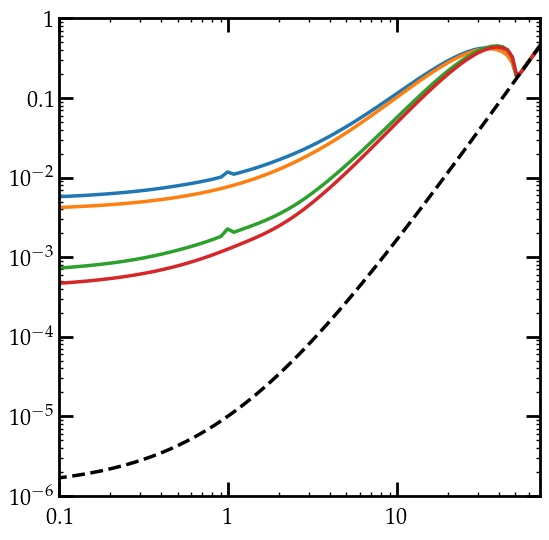

In [130]:
plt.figure()

plt.loglog()

plt.plot(raw_boost_data[:,0]-1, np.sqrt(raw_boost_data[:,1])*all_data[0][:,1]/1e9)
plt.plot(raw_boost_data[:,0]-1, np.sqrt(raw_boost_data[:,2])*all_data[1][:,1]/1e9)
plt.plot(raw_boost_data[:,0]-1, np.sqrt(raw_boost_data[:,3])*all_data[2][:,1]/1e9)
plt.plot(raw_boost_data[:,0]-1, np.sqrt(raw_boost_data[:,4])*all_data[3][:,1]/1e9)
plt.plot(raw_boost_data[:,0]-1, phys.rho_DM*raw_boost_data[:,0]**3*1e-9, 'k--')

plt.axis([0.1, 70, 1e-6, 1])

In [129]:
np.sqrt(raw_boost_data[:,1])*all_data[0][:,1]

array([5.22733600e+06, 5.33307344e+06, 5.44631911e+06, 5.56798948e+06,
       5.69857220e+06, 5.83867263e+06, 5.98892977e+06, 6.14925114e+06,
       6.32012440e+06, 6.50482861e+06, 6.70288453e+06, 6.91567104e+06,
       7.14302000e+06, 7.38965662e+06, 7.65652259e+06, 7.93726996e+06,
       8.22174203e+06, 8.53575936e+06, 8.87711911e+06, 9.24908353e+06,
       9.66174206e+06, 1.01465402e+07, 1.17526966e+07, 1.10241542e+07,
       1.15636035e+07, 1.21583766e+07, 1.28086417e+07, 1.35309623e+07,
       1.43248339e+07, 1.52052226e+07, 1.61951659e+07, 1.72659929e+07,
       1.84395642e+07, 1.97608618e+07, 2.12411524e+07, 2.28893482e+07,
       2.47659020e+07, 2.68760265e+07, 2.92536056e+07, 3.19551401e+07,
       3.50075352e+07, 3.84879753e+07, 4.24560722e+07, 4.69592463e+07,
       5.21167212e+07, 5.79991232e+07, 6.47356813e+07, 7.24500753e+07,
       8.12001514e+07, 9.13423195e+07, 1.02817388e+08, 1.15926107e+08,
       1.30820658e+08, 1.47628002e+08, 1.66577672e+08, 1.87717593e+08,
      

In [133]:
np.savetxt('/Users/hongwan/Dropbox (MIT)/Photon Deposition/DarkHistory_data/boost_data.txt', raw_boost_data)

In [132]:
?np.savetxt